In [41]:
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
from scipy.stats import binned_statistic_dd
from exod.pre_processing.read_events import get_filtered_events_files
from astropy.table import Table

from exod.pre_processing.event_filtering import filter_obsid_events
from exod.pre_processing.download_observations import download_observation_events
from exod.processing.variability import extract_var_regions, get_regions_sky_position, \
    plot_var_with_regions, get_region_lightcurves, calc_KS_poission, plot_region_lightcurves, calc_var_img
from exod.utils.logger import logger, get_current_date_string

from exod.pre_processing.download_observations import read_observation_ids
from exod.pre_processing.read_events import read_EPIC_events_file
from exod.utils.path import data, data_results
from matplotlib.colors import LogNorm
import random
from skimage.measure import label, regionprops
from scipy.stats import zscore
from astropy.stats import sigma_clip

In [56]:
 V_filt, lo, hi = sigma_clip(
                            v_arr,
                            sigma=3,
                            sigma_lower=None,
                            sigma_upper=None,
                            maxiters=5,
                            cenfunc='median',
                            stdfunc='std',
                            axis=None,
                            masked=True,
                            return_bounds=True,
                            copy=True,
                            grow=False
                        )

2024-01-10 17:42:20,550 - WARNING - read_events.py:PN_remove_borders - Ejecting PN Borders **MAY HAVE TO BE ADAPTED FOR OBSERVING MODES**
/home/nkhan/EXOD2/exod/processing/variability.py:30: RuntimeWarning: All-NaN axis encountered
  condition = np.nanmax((image_max - image_median, image_median - image_min)) / image_median


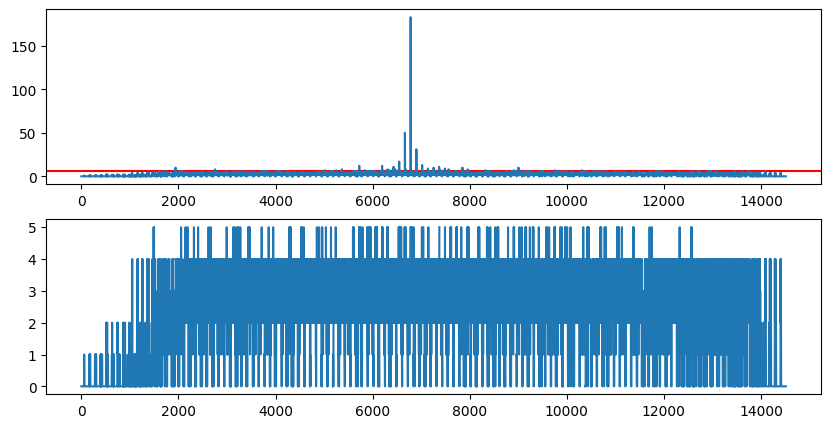

2024-01-10 17:42:21,034 - WARNING - read_events.py:PN_remove_borders - Ejecting PN Borders **MAY HAVE TO BE ADAPTED FOR OBSERVING MODES**


10 19458 1945 4.0


/home/nkhan/EXOD2/exod/processing/variability.py:30: RuntimeWarning: All-NaN axis encountered
  condition = np.nanmax((image_max - image_median, image_median - image_min)) / image_median


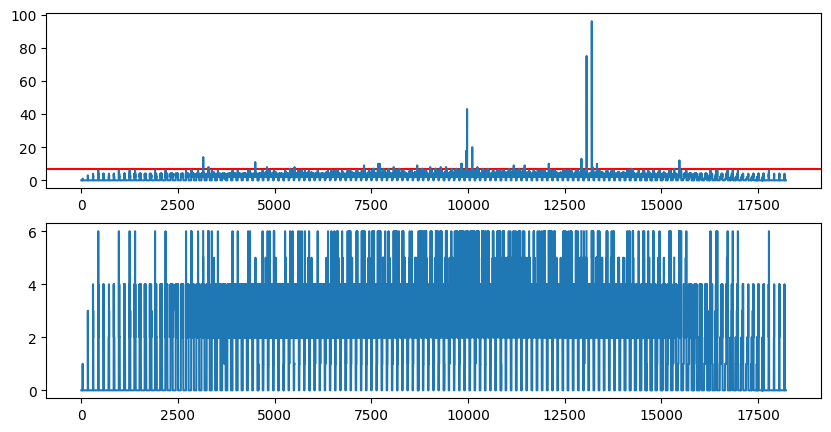

10 19458 1945 4.0


/home/nkhan/EXOD2/exod/processing/variability.py:30: RuntimeWarning: divide by zero encountered in divide
  condition = np.nanmax((image_max - image_median, image_median - image_min)) / image_median


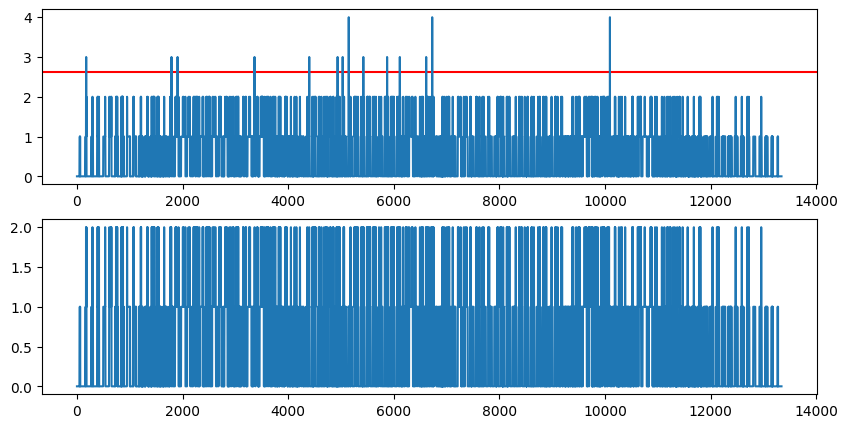

2024-01-10 17:42:21,903 - WARNING - read_events.py:PN_remove_borders - Ejecting PN Borders **MAY HAVE TO BE ADAPTED FOR OBSERVING MODES**


10 19458 1945 4.0


/home/nkhan/EXOD2/exod/processing/variability.py:30: RuntimeWarning: divide by zero encountered in divide
  condition = np.nanmax((image_max - image_median, image_median - image_min)) / image_median


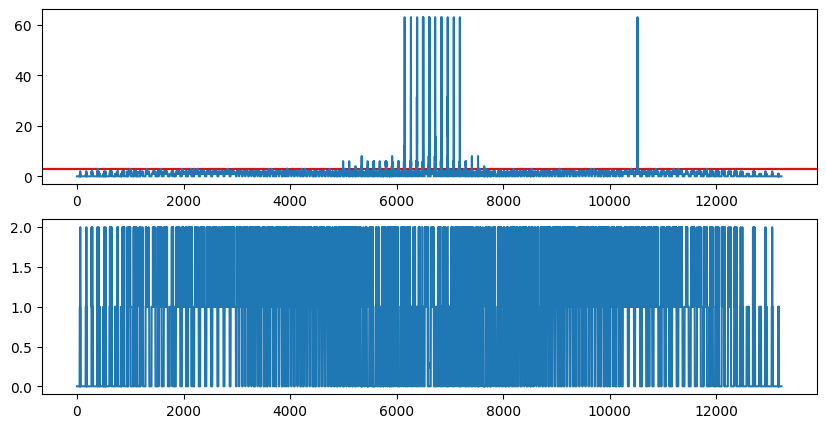

2024-01-10 17:42:22,266 - WARNING - read_events.py:PN_remove_borders - Ejecting PN Borders **MAY HAVE TO BE ADAPTED FOR OBSERVING MODES**


10 19458 1945 4.0


/home/nkhan/EXOD2/exod/processing/variability.py:30: RuntimeWarning: divide by zero encountered in divide
  condition = np.nanmax((image_max - image_median, image_median - image_min)) / image_median


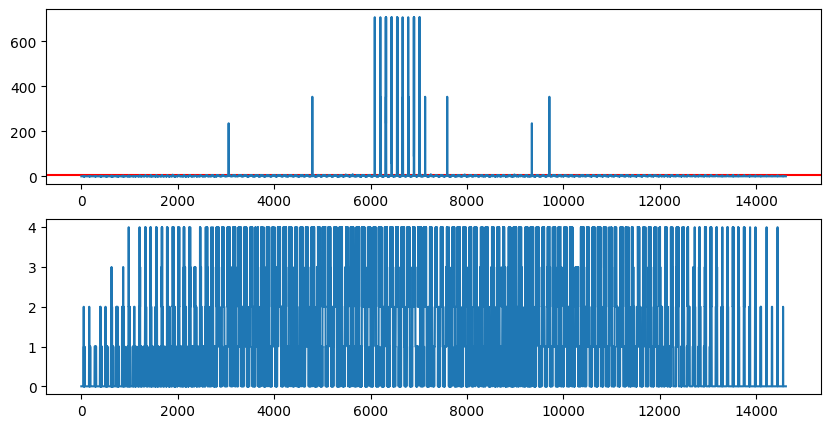

2024-01-10 17:42:22,617 - WARNING - read_events.py:PN_remove_borders - Ejecting PN Borders **MAY HAVE TO BE ADAPTED FOR OBSERVING MODES**
2024-01-10 17:42:22,689 - WARNING - read_events.py:PN_remove_borders - Ejecting PN Borders **MAY HAVE TO BE ADAPTED FOR OBSERVING MODES**


10 19458 1945 4.0
No Event files found for observation: 0112570701
zero-size array to reduction operation minimum which has no identity
submode: FastUncompressed is not supported


/home/nkhan/EXOD2/exod/processing/variability.py:30: RuntimeWarning: divide by zero encountered in divide
  condition = np.nanmax((image_max - image_median, image_median - image_min)) / image_median


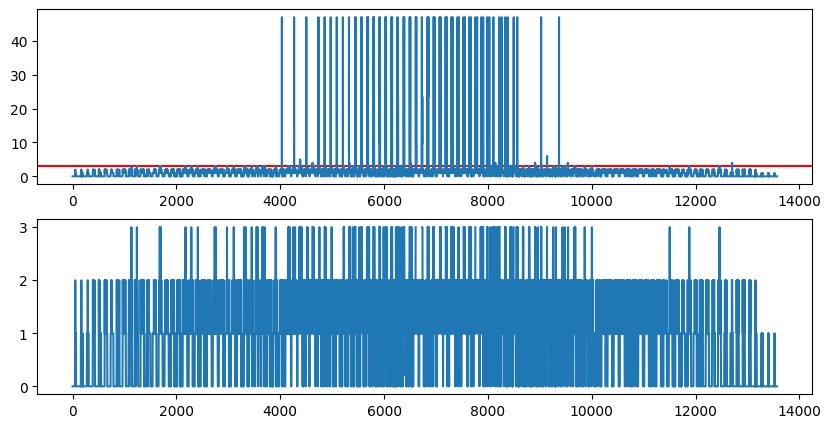

2024-01-10 17:42:23,263 - WARNING - read_events.py:PN_remove_borders - Ejecting PN Borders **MAY HAVE TO BE ADAPTED FOR OBSERVING MODES**


10 19458 1945 4.0
Overlapping subset has 8 event files! (>3) I still havent figured out how to seperate these out
Overlapping subset has 5 event files! (>3) I still havent figured out how to seperate these out
submode: FastUncompressed is not supported
submode: FastUncompressed is not supported


/home/nkhan/EXOD2/exod/processing/variability.py:30: RuntimeWarning: All-NaN axis encountered
  condition = np.nanmax((image_max - image_median, image_median - image_min)) / image_median


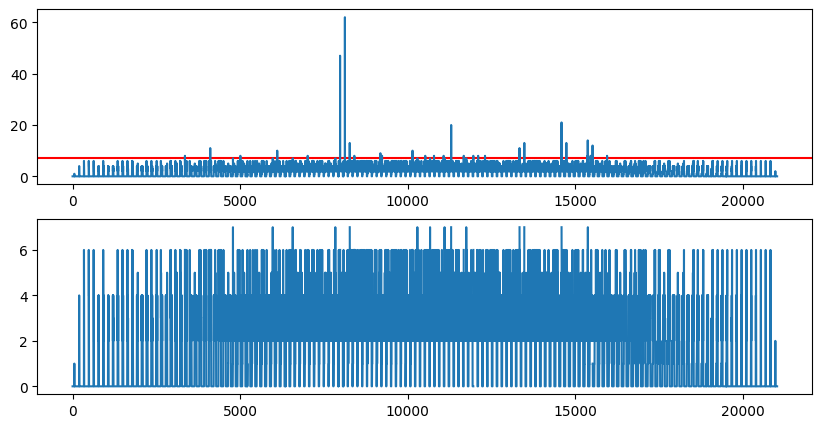

2024-01-10 17:42:23,803 - WARNING - read_events.py:PN_remove_borders - Ejecting PN Borders **MAY HAVE TO BE ADAPTED FOR OBSERVING MODES**


10 19458 1945 4.0


/home/nkhan/EXOD2/exod/processing/variability.py:30: RuntimeWarning: All-NaN axis encountered
  condition = np.nanmax((image_max - image_median, image_median - image_min)) / image_median


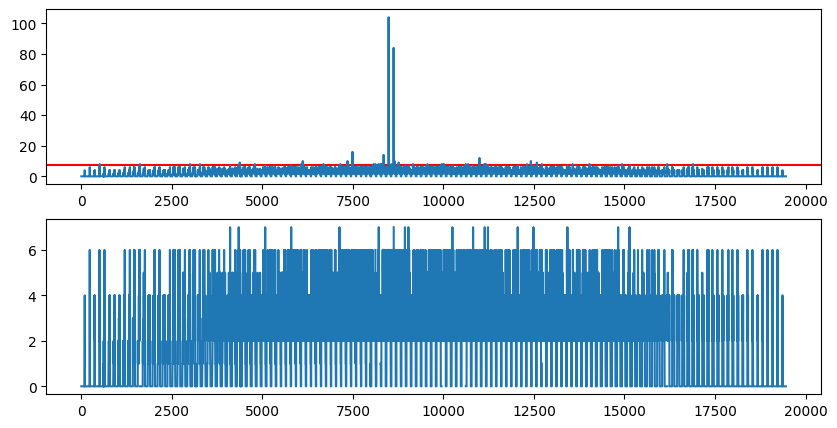

2024-01-10 17:42:24,555 - WARNING - read_events.py:PN_remove_borders - Ejecting PN Borders **MAY HAVE TO BE ADAPTED FOR OBSERVING MODES**


10 19458 1945 4.0


/home/nkhan/EXOD2/exod/processing/variability.py:30: RuntimeWarning: divide by zero encountered in divide
  condition = np.nanmax((image_max - image_median, image_median - image_min)) / image_median


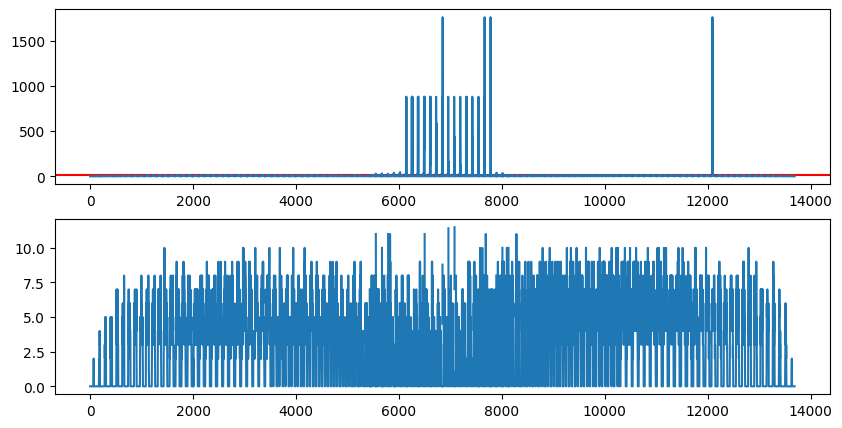

2024-01-10 17:42:26,974 - WARNING - read_events.py:PN_remove_borders - Ejecting PN Borders **MAY HAVE TO BE ADAPTED FOR OBSERVING MODES**


10 19458 1945 4.0


/home/nkhan/EXOD2/exod/processing/variability.py:30: RuntimeWarning: divide by zero encountered in divide
  condition = np.nanmax((image_max - image_median, image_median - image_min)) / image_median


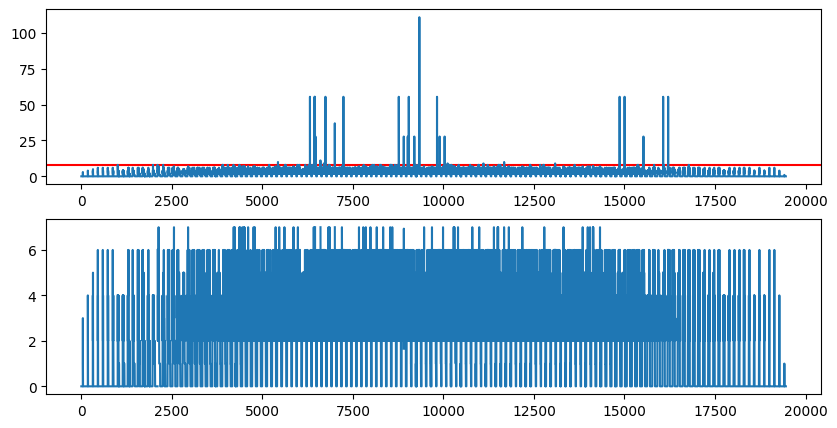

2024-01-10 17:42:27,348 - WARNING - read_events.py:PN_remove_borders - Ejecting PN Borders **MAY HAVE TO BE ADAPTED FOR OBSERVING MODES**


10 19458 1945 4.0


/home/nkhan/EXOD2/exod/processing/variability.py:30: RuntimeWarning: divide by zero encountered in divide
  condition = np.nanmax((image_max - image_median, image_median - image_min)) / image_median


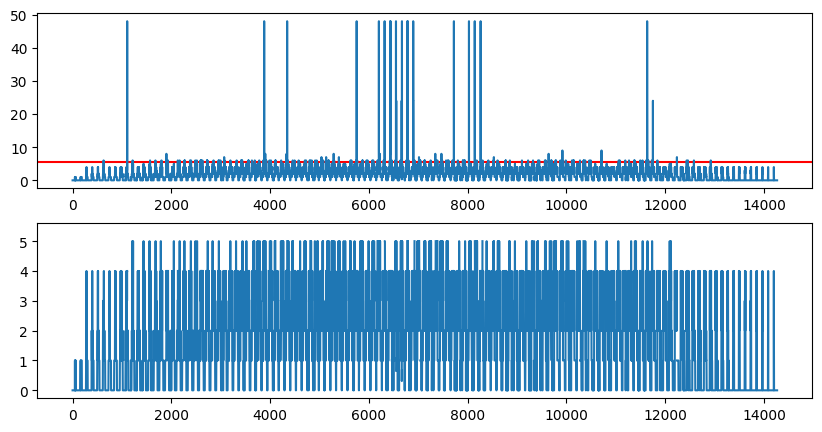

10 19458 1945 4.0


/home/nkhan/EXOD2/exod/processing/variability.py:30: RuntimeWarning: All-NaN axis encountered
  condition = np.nanmax((image_max - image_median, image_median - image_min)) / image_median


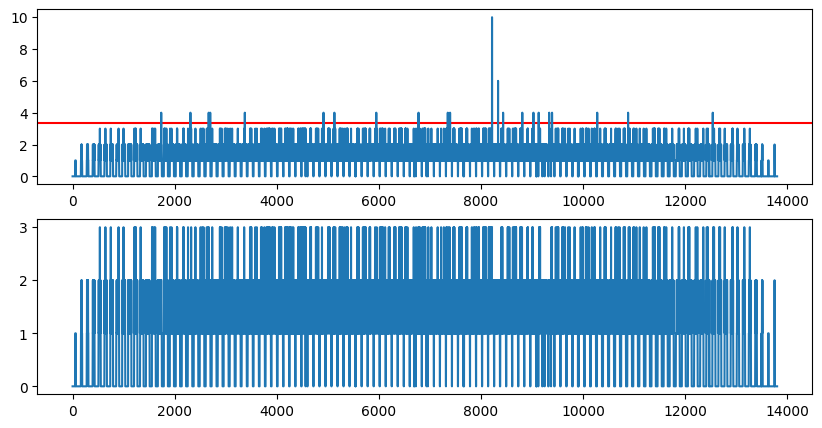

10 19458 1945 4.0


2024-01-10 17:42:28,550 - WARNING - read_events.py:PN_remove_borders - Ejecting PN Borders **MAY HAVE TO BE ADAPTED FOR OBSERVING MODES**
/home/nkhan/EXOD2/exod/processing/variability.py:30: RuntimeWarning: divide by zero encountered in divide
  condition = np.nanmax((image_max - image_median, image_median - image_min)) / image_median


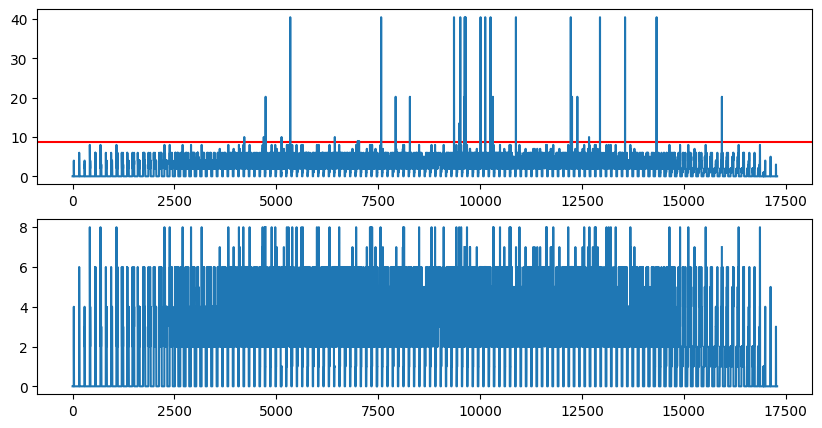

2024-01-10 17:42:29,261 - WARNING - read_events.py:PN_remove_borders - Ejecting PN Borders **MAY HAVE TO BE ADAPTED FOR OBSERVING MODES**


10 19458 1945 4.0


/home/nkhan/EXOD2/exod/processing/variability.py:30: RuntimeWarning: All-NaN axis encountered
  condition = np.nanmax((image_max - image_median, image_median - image_min)) / image_median


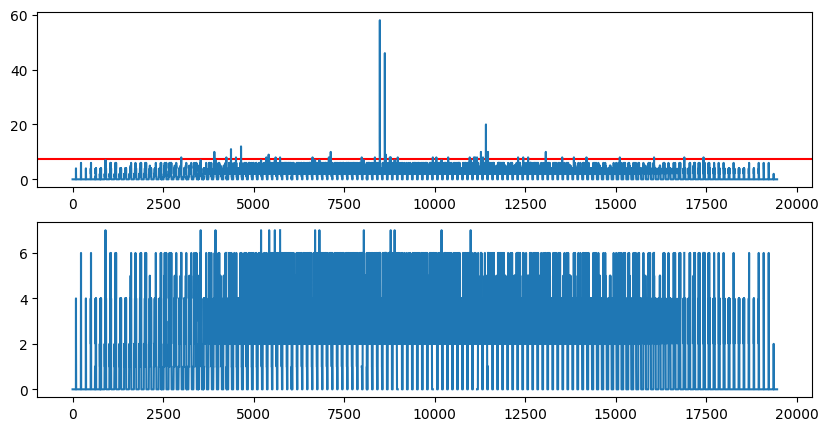

10 19458 1945 4.0


2024-01-10 17:42:30,048 - WARNING - read_events.py:PN_remove_borders - Ejecting PN Borders **MAY HAVE TO BE ADAPTED FOR OBSERVING MODES**
/home/nkhan/EXOD2/exod/processing/variability.py:30: RuntimeWarning: All-NaN axis encountered
  condition = np.nanmax((image_max - image_median, image_median - image_min)) / image_median


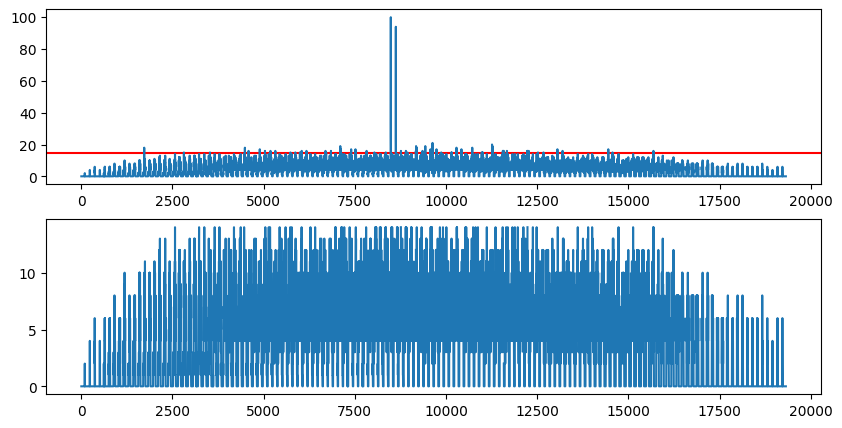

2024-01-10 17:42:32,775 - WARNING - read_events.py:PN_remove_borders - Ejecting PN Borders **MAY HAVE TO BE ADAPTED FOR OBSERVING MODES**


10 19458 1945 4.0


/home/nkhan/EXOD2/exod/processing/variability.py:30: RuntimeWarning: All-NaN axis encountered
  condition = np.nanmax((image_max - image_median, image_median - image_min)) / image_median


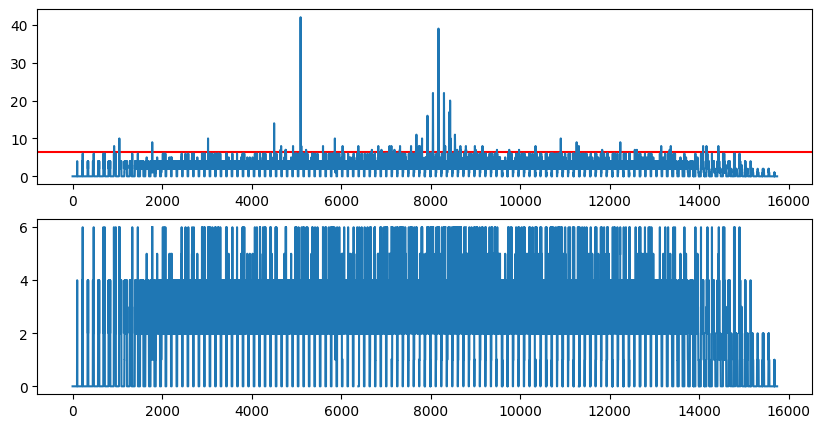

2024-01-10 17:42:33,291 - WARNING - read_events.py:PN_remove_borders - Ejecting PN Borders **MAY HAVE TO BE ADAPTED FOR OBSERVING MODES**


10 19458 1945 4.0
Overlapping subset has 5 event files! (>3) I still havent figured out how to seperate these out


/home/nkhan/EXOD2/exod/processing/variability.py:30: RuntimeWarning: divide by zero encountered in divide
  condition = np.nanmax((image_max - image_median, image_median - image_min)) / image_median


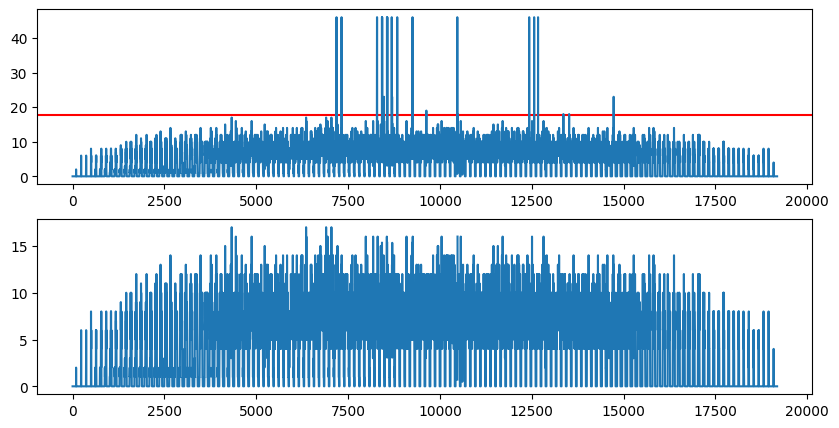

2024-01-10 17:42:34,068 - WARNING - read_events.py:PN_remove_borders - Ejecting PN Borders **MAY HAVE TO BE ADAPTED FOR OBSERVING MODES**


10 19458 1945 4.0


/home/nkhan/EXOD2/exod/processing/variability.py:30: RuntimeWarning: divide by zero encountered in divide
  condition = np.nanmax((image_max - image_median, image_median - image_min)) / image_median


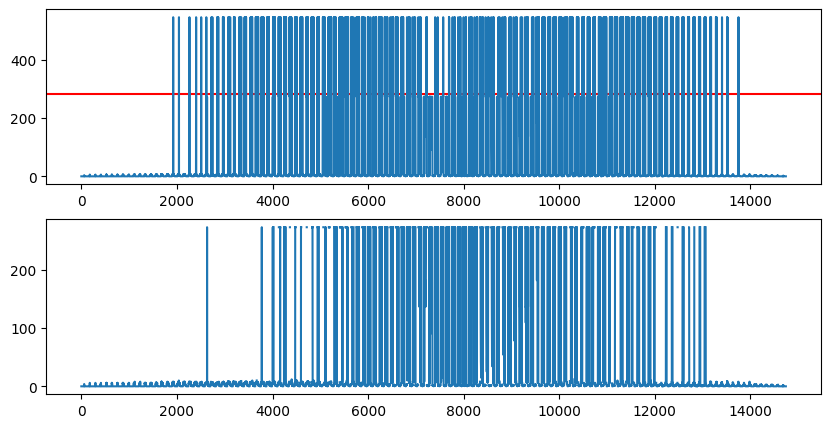

2024-01-10 17:42:34,741 - WARNING - read_events.py:PN_remove_borders - Ejecting PN Borders **MAY HAVE TO BE ADAPTED FOR OBSERVING MODES**


10 19458 1945 4.0


/home/nkhan/EXOD2/exod/processing/variability.py:30: RuntimeWarning: All-NaN axis encountered
  condition = np.nanmax((image_max - image_median, image_median - image_min)) / image_median


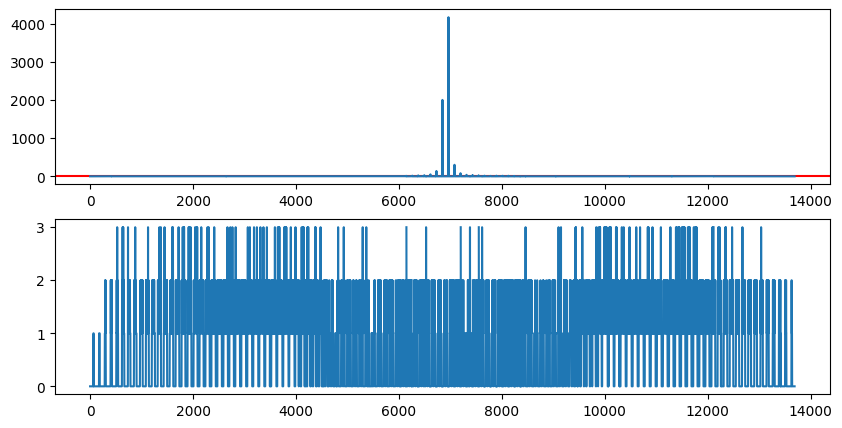

10 19458 1945 4.0
No Event files found for observation: 0820880501


2024-01-10 17:42:35,873 - WARNING - read_events.py:PN_remove_borders - Ejecting PN Borders **MAY HAVE TO BE ADAPTED FOR OBSERVING MODES**
/home/nkhan/EXOD2/exod/processing/variability.py:30: RuntimeWarning: All-NaN axis encountered
  condition = np.nanmax((image_max - image_median, image_median - image_min)) / image_median


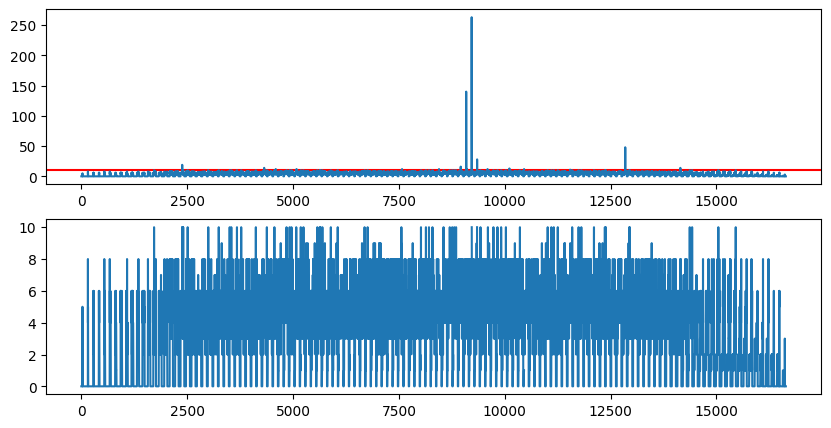

2024-01-10 17:42:39,827 - WARNING - read_events.py:PN_remove_borders - Ejecting PN Borders **MAY HAVE TO BE ADAPTED FOR OBSERVING MODES**


10 19458 1945 4.0


/home/nkhan/EXOD2/exod/processing/variability.py:30: RuntimeWarning: All-NaN axis encountered
  condition = np.nanmax((image_max - image_median, image_median - image_min)) / image_median


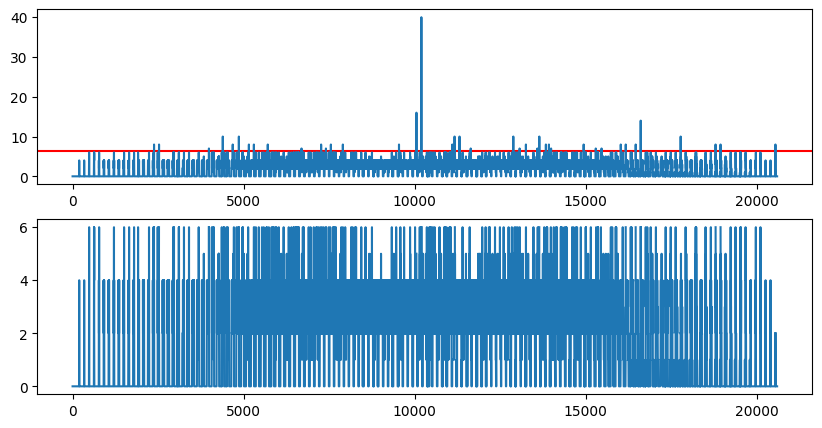

2024-01-10 17:42:40,459 - WARNING - read_events.py:PN_remove_borders - Ejecting PN Borders **MAY HAVE TO BE ADAPTED FOR OBSERVING MODES**


10 19458 1945 4.0


/home/nkhan/EXOD2/exod/processing/variability.py:30: RuntimeWarning: divide by zero encountered in divide
  condition = np.nanmax((image_max - image_median, image_median - image_min)) / image_median


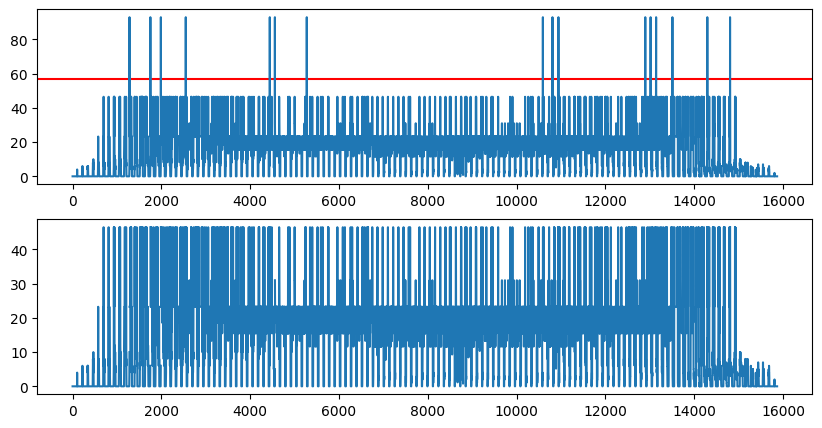

2024-01-10 17:42:41,411 - WARNING - read_events.py:PN_remove_borders - Ejecting PN Borders **MAY HAVE TO BE ADAPTED FOR OBSERVING MODES**


10 19458 1945 4.0


/home/nkhan/EXOD2/exod/processing/variability.py:30: RuntimeWarning: All-NaN axis encountered
  condition = np.nanmax((image_max - image_median, image_median - image_min)) / image_median


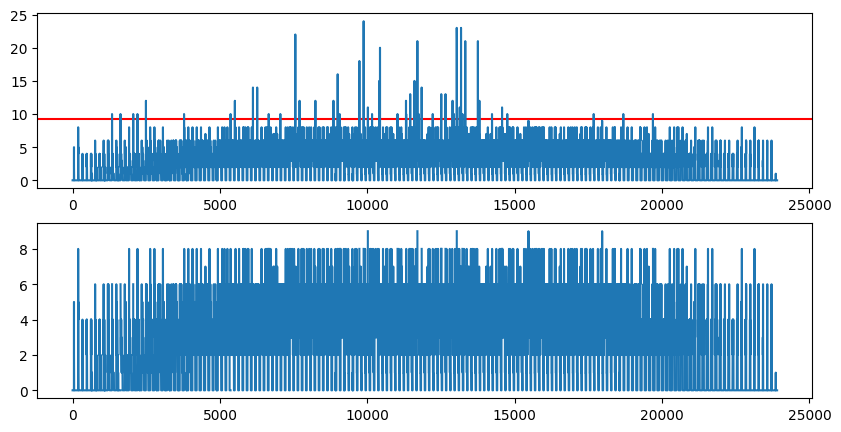

2024-01-10 17:42:42,944 - WARNING - read_events.py:PN_remove_borders - Ejecting PN Borders **MAY HAVE TO BE ADAPTED FOR OBSERVING MODES**


10 19458 1945 4.0
Overlapping subset has 5 event files! (>3) I still havent figured out how to seperate these out


/home/nkhan/EXOD2/exod/processing/variability.py:30: RuntimeWarning: All-NaN axis encountered
  condition = np.nanmax((image_max - image_median, image_median - image_min)) / image_median


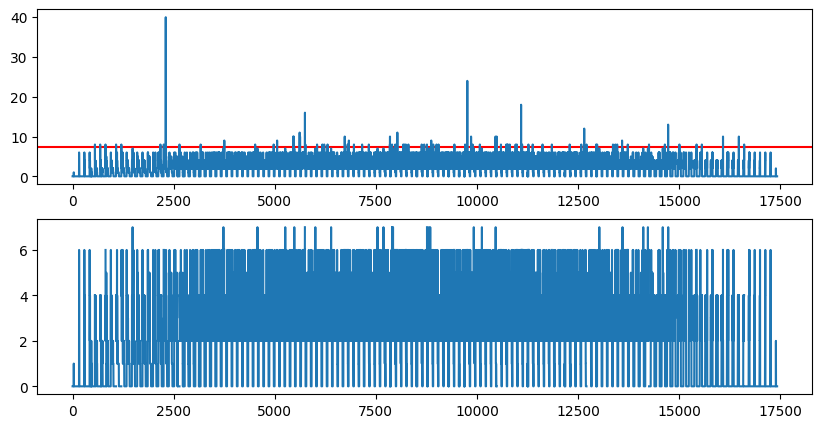

2024-01-10 17:42:43,628 - WARNING - read_events.py:PN_remove_borders - Ejecting PN Borders **MAY HAVE TO BE ADAPTED FOR OBSERVING MODES**


10 19458 1945 4.0
No Event files found for observation: 0921180101


/home/nkhan/EXOD2/exod/processing/variability.py:30: RuntimeWarning: All-NaN axis encountered
  condition = np.nanmax((image_max - image_median, image_median - image_min)) / image_median


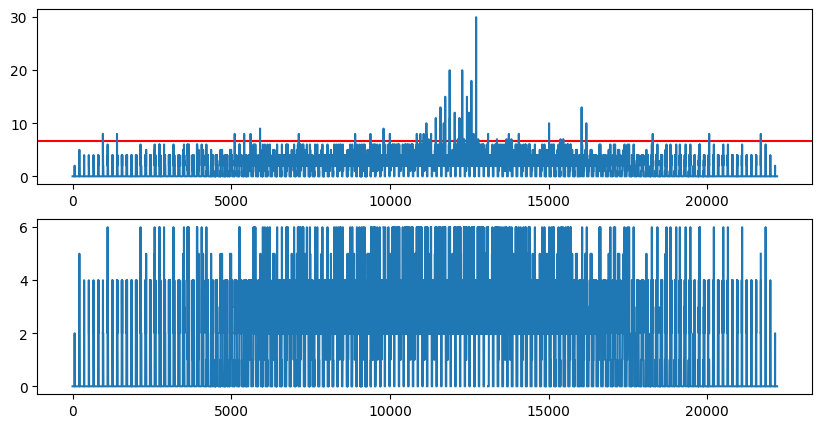

2024-01-10 17:42:44,013 - WARNING - read_events.py:PN_remove_borders - Ejecting PN Borders **MAY HAVE TO BE ADAPTED FOR OBSERVING MODES**


10 19458 1945 4.0


/home/nkhan/EXOD2/exod/processing/variability.py:30: RuntimeWarning: All-NaN axis encountered
  condition = np.nanmax((image_max - image_median, image_median - image_min)) / image_median


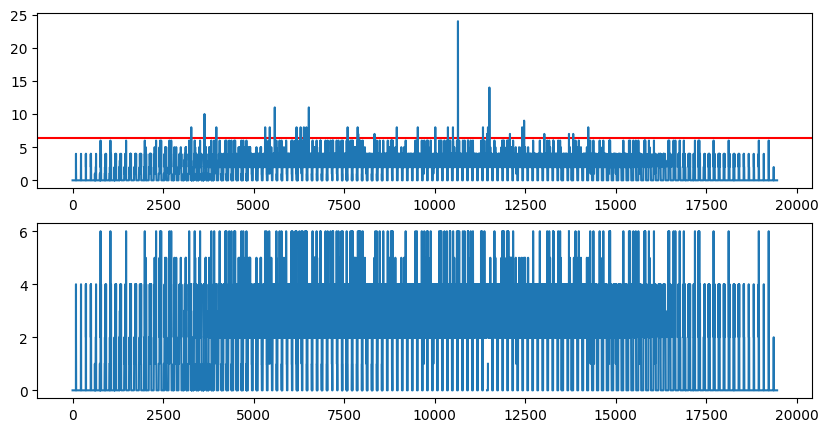

10 19458 1945 4.0


2024-01-10 17:42:44,709 - WARNING - read_events.py:PN_remove_borders - Ejecting PN Borders **MAY HAVE TO BE ADAPTED FOR OBSERVING MODES**
/home/nkhan/EXOD2/exod/processing/variability.py:30: RuntimeWarning: All-NaN axis encountered
  condition = np.nanmax((image_max - image_median, image_median - image_min)) / image_median


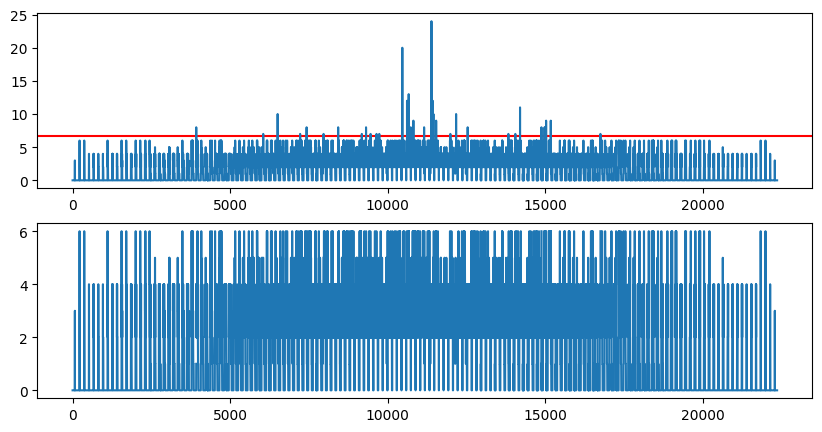

2024-01-10 17:42:47,037 - WARNING - read_events.py:PN_remove_borders - Ejecting PN Borders **MAY HAVE TO BE ADAPTED FOR OBSERVING MODES**


10 19458 1945 4.0


/home/nkhan/EXOD2/exod/processing/variability.py:30: RuntimeWarning: divide by zero encountered in divide
  condition = np.nanmax((image_max - image_median, image_median - image_min)) / image_median


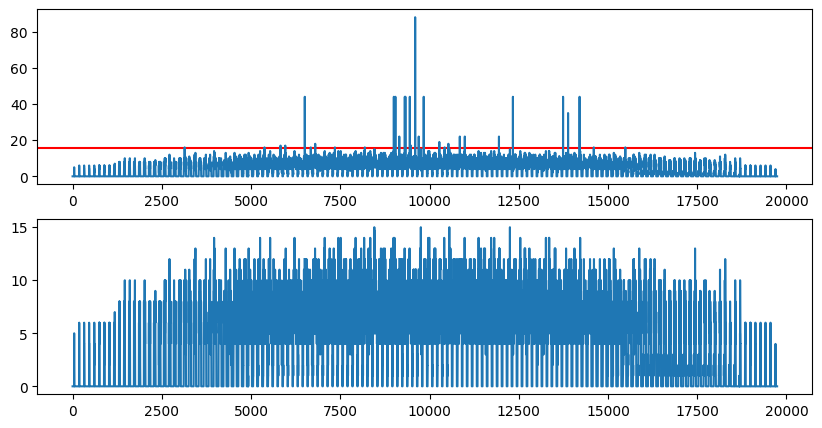

2024-01-10 17:42:48,008 - WARNING - read_events.py:PN_remove_borders - Ejecting PN Borders **MAY HAVE TO BE ADAPTED FOR OBSERVING MODES**


10 19458 1945 4.0


/home/nkhan/EXOD2/exod/processing/variability.py:30: RuntimeWarning: divide by zero encountered in divide
  condition = np.nanmax((image_max - image_median, image_median - image_min)) / image_median


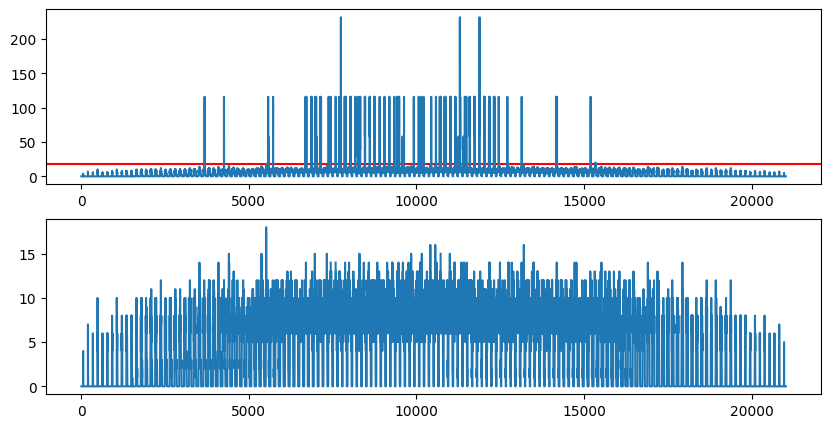

2024-01-10 17:42:49,588 - WARNING - read_events.py:PN_remove_borders - Ejecting PN Borders **MAY HAVE TO BE ADAPTED FOR OBSERVING MODES**


10 19458 1945 4.0


/home/nkhan/EXOD2/exod/processing/variability.py:30: RuntimeWarning: divide by zero encountered in divide
  condition = np.nanmax((image_max - image_median, image_median - image_min)) / image_median


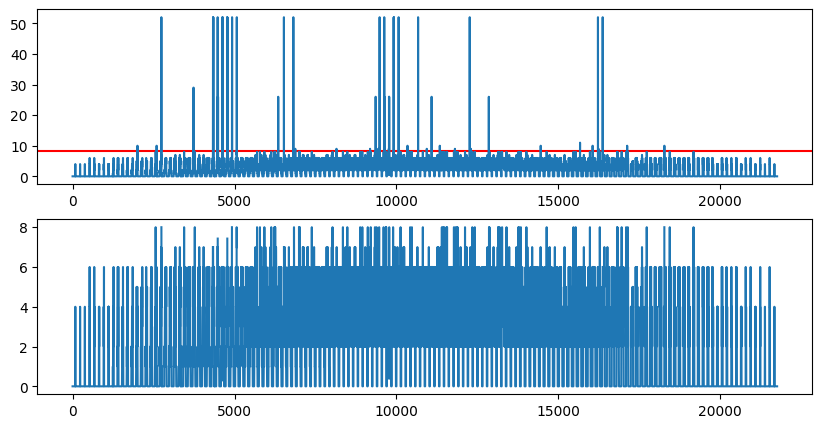

2024-01-10 17:42:50,253 - WARNING - read_events.py:PN_remove_borders - Ejecting PN Borders **MAY HAVE TO BE ADAPTED FOR OBSERVING MODES**


10 19458 1945 4.0


/home/nkhan/EXOD2/exod/processing/variability.py:30: RuntimeWarning: divide by zero encountered in divide
  condition = np.nanmax((image_max - image_median, image_median - image_min)) / image_median


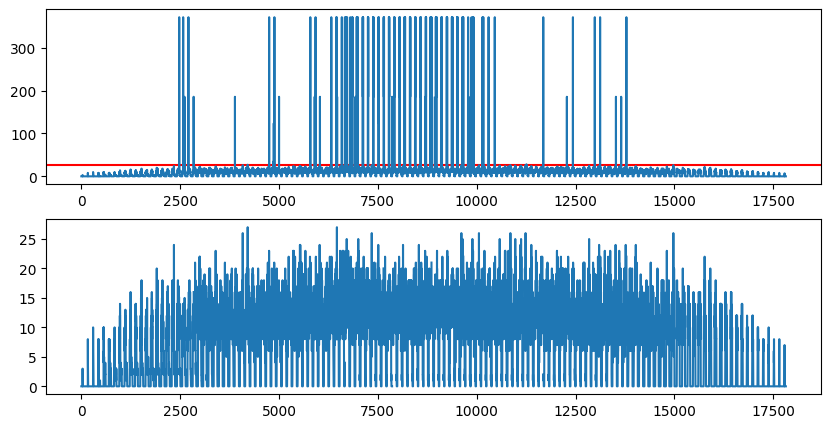

2024-01-10 17:42:52,439 - WARNING - read_events.py:PN_remove_borders - Ejecting PN Borders **MAY HAVE TO BE ADAPTED FOR OBSERVING MODES**


10 19458 1945 4.0


/home/nkhan/EXOD2/exod/processing/variability.py:30: RuntimeWarning: All-NaN axis encountered
  condition = np.nanmax((image_max - image_median, image_median - image_min)) / image_median


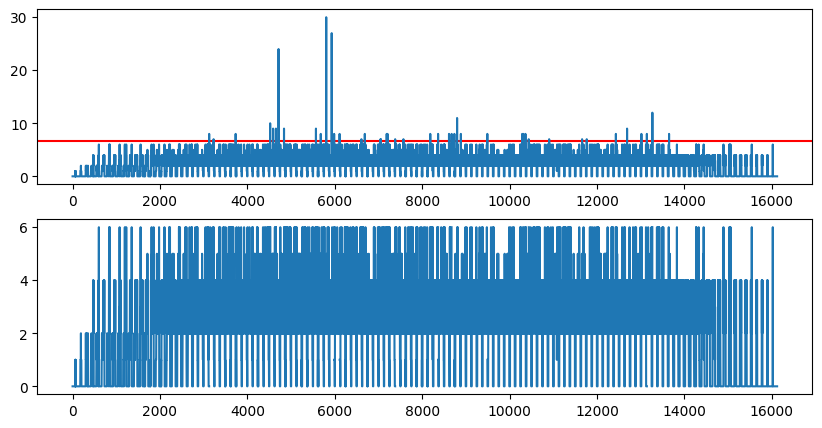

2024-01-10 17:42:52,940 - WARNING - read_events.py:PN_remove_borders - Ejecting PN Borders **MAY HAVE TO BE ADAPTED FOR OBSERVING MODES**


10 19458 1945 4.0


/home/nkhan/EXOD2/exod/processing/variability.py:30: RuntimeWarning: divide by zero encountered in divide
  condition = np.nanmax((image_max - image_median, image_median - image_min)) / image_median


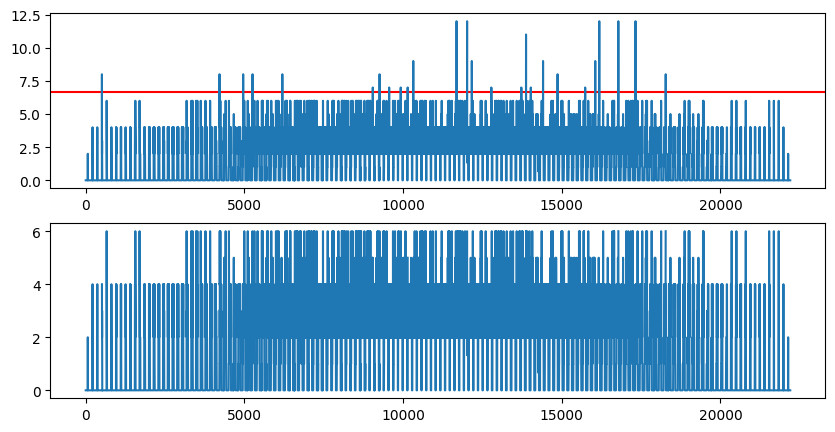

2024-01-10 17:42:53,389 - WARNING - read_events.py:PN_remove_borders - Ejecting PN Borders **MAY HAVE TO BE ADAPTED FOR OBSERVING MODES**


10 19458 1945 4.0


/home/nkhan/EXOD2/exod/processing/variability.py:30: RuntimeWarning: All-NaN axis encountered
  condition = np.nanmax((image_max - image_median, image_median - image_min)) / image_median


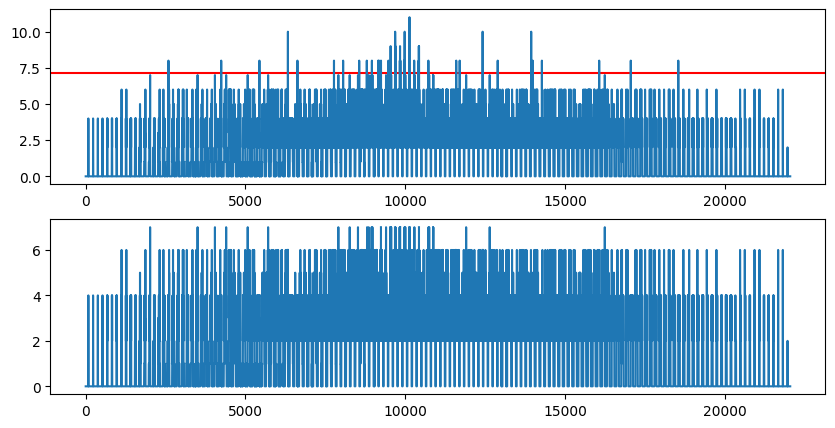

2024-01-10 17:42:53,869 - WARNING - read_events.py:PN_remove_borders - Ejecting PN Borders **MAY HAVE TO BE ADAPTED FOR OBSERVING MODES**


10 19458 1945 4.0


/home/nkhan/EXOD2/exod/processing/variability.py:30: RuntimeWarning: All-NaN axis encountered
  condition = np.nanmax((image_max - image_median, image_median - image_min)) / image_median


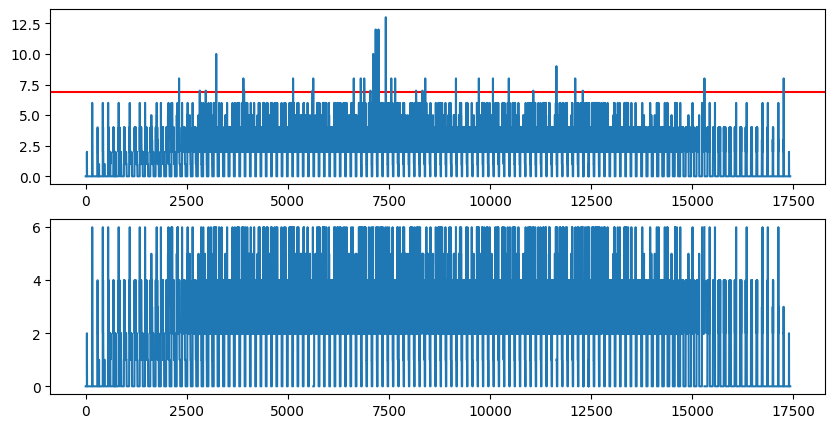

2024-01-10 17:42:54,438 - WARNING - read_events.py:PN_remove_borders - Ejecting PN Borders **MAY HAVE TO BE ADAPTED FOR OBSERVING MODES**


10 19458 1945 4.0


/home/nkhan/EXOD2/exod/processing/variability.py:30: RuntimeWarning: All-NaN axis encountered
  condition = np.nanmax((image_max - image_median, image_median - image_min)) / image_median


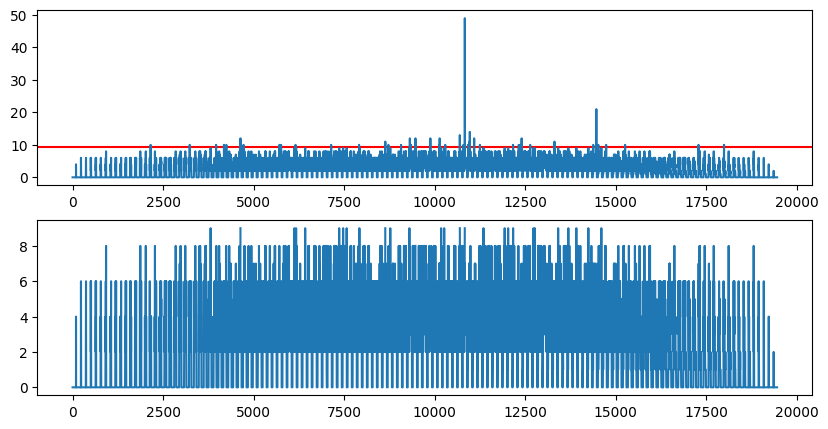

10 19458 1945 4.0


In [60]:
obsids = read_observation_ids('../data/observations.txt')

for obsid in obsids:
    args = {'obsid':obsid,
            'size_arcsec':15,
            'time_interval':100,
            'gti_only':True,
            'min_energy':0.2,
            'max_energy':12}
    try:
        cube, coordinates_XY = read_EPIC_events_file(**args)
        var_img = calc_var_img(cube=cube)
        fig, ax = plt.subplots(2,1, figsize=(10,5))
        
        v_arr = var_img.flatten()

        v_filt, lo, hi = sigma_clip(
                            v_arr,
                            sigma=3,
                            sigma_lower=None,
                            sigma_upper=None,
                            maxiters=5,
                            cenfunc='median',
                            stdfunc='std',
                            axis=None,
                            masked=True,
                            return_bounds=True,
                            copy=True,
                            grow=False
                        )
                         
        ax[0].axhline(hi, color='red')
        ax[0].plot(v_arr)
        ax[1].plot(v_filt)
        plt.show()
        
        print(threshold_percent, n_pixels, n_brightest, value)
    except Exception as e:
        print(e)

In [ ]:
obsids = read_observation_ids('../data/observations.txt')
for obsid in obsids:
    args = {'obsid':obsid,
            'size_arcsec':5,
            'time_interval':100,
            'box_size':3,
            'gti_only':True,
            'min_energy':0.2,
            'max_energy':12}
    
    # Read the event files and create the data cube
    try:
        cube, coordinates_XY = read_EPIC_events_file(**args)
    except:
        continue
    var_img = calc_var_img(cube=cube)

    fig, ax = plt.subplots(1,2,figsize=(10,5))
    threshold = 4
    ax[0].set_title('Variability Image')
    ax[0].imshow(var_img)
    ax[1].set_title(f'Mask Threshold = {threshold}')
    ax[1].imshow(var_img>threshold, cmap='grey')
    fig.suptitle(f'{np.mean(var_img)} thresh={threshold}')
    plt.show()
    

In [ ]:
np.mean(var_img)
np.mean(var_img[var_img > 0])
np.mean(var_img[var_img > 1])

In [ ]:
plt.imshow(var_img > 3)

In [ ]:
logger.info('Extracting variable Regions')
threshold = 4
threshold_value = threshold * np.median(var_img)
logger.info(f'Threshold multiplier: {threshold} threshold_value: {threshold_value}')
var_img_mask = var_img > threshold_value

var_img_mask_labelled = label(var_img_mask,
                             background=None,
                              return_num=False, 
                              connectivity=5)

# Plot the labelled variable regions
plt.figure(figsize=(8,8))
plt.title('Identified Variable Regions')
plt.imshow(var_img_mask_labelled.T,
           cmap='tab20c',
           interpolation='none',
           origin='lower')
plt.colorbar()

# Obtain the region properties for the detected regions.
regions = regionprops(label_image=var_img_mask_labelled,
                      intensity_image=var_img)

all_res = []
for i, r in enumerate(regions):
    # We can pull out a lot from each region here
    # See: https://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops
    res = {'region_number'     : i,
           'weighted_centroid' : r.weighted_centroid,
           'x_centroid'        : r.weighted_centroid[0],
           'y_centroid'        : r.weighted_centroid[1],
           'bbox'              : r.bbox,
           'intensity_mean'    : r.intensity_mean}
    all_res.append(res)

df_regions = pd.DataFrame(all_res)
df_regions

In [ ]:
tab_evt = Table.read('../data/processed/0001730201/P0001730201M1S001MIEVLI0000_FILT.fits', hdu=1)

In [ ]:
def event_list_to_data_cube(tab_evt):
    x = data_EPIC['X']
    y = data_EPIC['Y']
    t = data_EPIC['TIME'])

    bin_x = np.linspace(0, extent, nb_pixels+1)
    bin_y = np.linspace(0, extent, nb_pixels+1)
    bin_t = np.arange(time_min, time_stop+1, time_interval)
    
    cube_EPIC = binned_statistic_dd((x,y,t),
                                values=None,
                                statistic='count',
                                bins=[bin_x, bin_y, bin_t])[0]
    return data_cube

data_cube = event_list_to_data_cube(tab_evt)

In [ ]:
def get_time_bins(time_array, bin_size_seconds=100):
    num_bins = int((np.max(time_array) - np.min(time_array)) / bin_size_seconds)
    bins = np.linspace(np.min(time_array), np.max(time_array), num_bins + 1)
    return bins

In [ ]:
tab_evt = Table.read(evt_files[0], hdu=1)

bin_x = np.arange(tab_evt['X'].min(), tab_evt['X'].max(), 10)
bin_y = np.arange(tab_evt['Y'].min(), tab_evt['Y'].max(), 10)
bin_t = get_time_bins(tab_evt['TIME'])

cube_EPIC = binned_statistic_dd(sample=(tab_evt['X'], tab_evt['Y'], tab_evt['TIME']),
                                values=None,
                                statistic='count',
                                bins=[bin_x, bin_y, bin_t])